<a href="https://colab.research.google.com/github/WillPG4/MachineLearning/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB7 – Machine Learning
Student : HAMDI Zaineb


# FINAL LAB 

## Loading dataset: `dataset.csv`

### First rows

,feat1,feat2,label
0,1.111069,0.969083,A
1,1.144828,1.340560,A
2,0.947642,0.947645,A
3,1.353123,1.171604,A
4,0.895022,1.121320,A


## Dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat1   130 non-null    float64
 1   feat2   130 non-null    float64
 2   label   131 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


None

## Missing values per column

,0
feat1,1
feat2,1
label,0


# 1. Data Exploration

## Basic statistics (features)

,feat1,feat2
count,130.000000,130.000000
mean,4.206799,2.100733
std,3.236094,2.128706
min,0.414207,0.555566
25%,1.057132,0.932788
50%,3.930786,1.160721
75%,7.745092,3.764397
max,20.000000,20.000000


## Class distribution

,count
label,
B,81
A,50


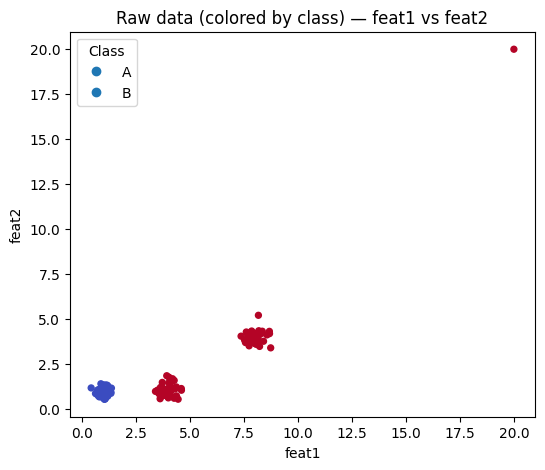

### Observations from data exploration
- The dataset contains two numerical features and a categorical label (A/B).
- Class A appears well-behaved and closer to being linearly separable.
- Class B is more dispersed, overlaps with Class A, and may include outliers.
- Therefore, we expect lower supervised performance on Class B.

# 2. Data Cleaning

## 2.1 Missing values handling

**Choice:** Median imputation It is robust to extreme values and suitable for numerical features (important due to Class B outliers).

Missing values after imputation:

,0
feat1,0
feat2,0


## 2.2 Outlier treatment (IQR rule)

We remove extreme outliers using the 1.5×IQR rule to limit the influence of extreme noisy points.

- Rows before outlier removal: **131**

- Rows after outlier removal: **130**

Cleaned class distribution:

,count
label,
B,80
A,50


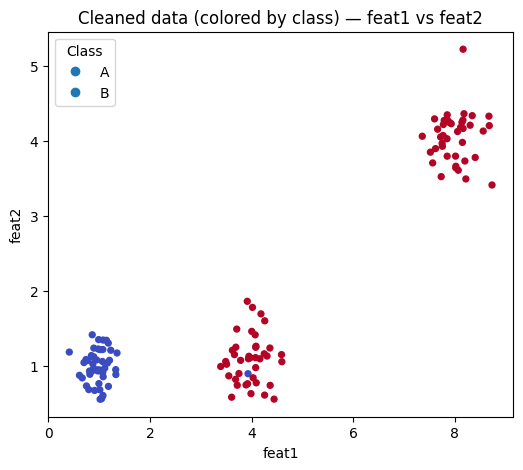

### Data cleaning justification
- Median imputation handles missing values without being overly sensitive to outliers.
- IQR filtering reduces the impact of extreme points, improving model stability.
- Cleaning helps, but Class B can remain difficult because noise/overlap are inherent.

# 3. Binary Classification

## 3.1 Train/test split + scaling

Positive class for precision/recall is set to: **B**

## 3.2 Model 1 — Logistic Regression

## Results — Logistic Regression

- **Accuracy**: `1.0000`

- **Precision (pos=B)**: `1.0000`

- **Recall (pos=B)**: `1.0000`

### Classification report

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        15
           B       1.00      1.00      1.00        24

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### Confusion matrix

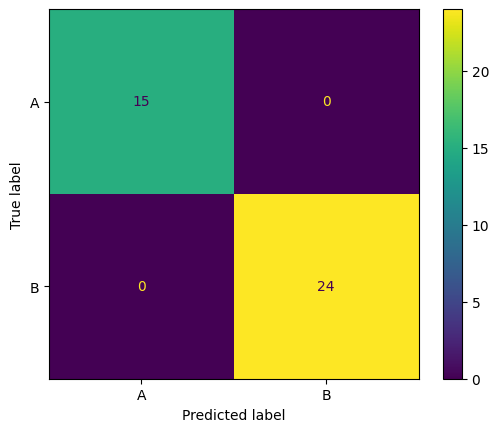

## 3.3 Model 2 — SVM (RBF kernel)

## Results — SVM (RBF)

- **Accuracy**: `1.0000`

- **Precision (pos=B)**: `1.0000`

- **Recall (pos=B)**: `1.0000`

### Classification report

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        15
           B       1.00      1.00      1.00        24

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### Confusion matrix

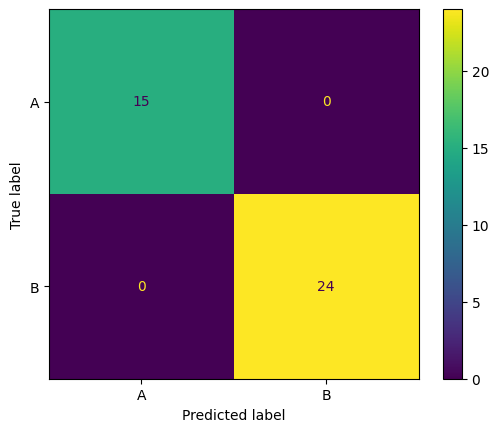

## (Optional) Model 3 — Random Forest

## Results — Random Forest

- **Accuracy**: `1.0000`

- **Precision (pos=B)**: `1.0000`

- **Recall (pos=B)**: `1.0000`

### Classification report

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        15
           B       1.00      1.00      1.00        24

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### Confusion matrix

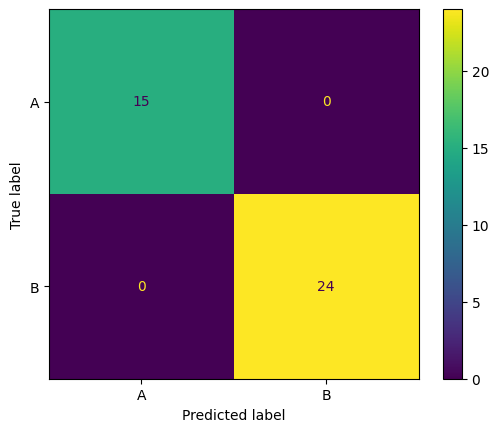

### Analysis of classification failure on Class B
- Class B is highly noisy and not cleanly separable.
- There is strong overlap between A and B, causing unavoidable confusion.
- Outliers and heterogeneity inside Class B degrade generalization.
- Linear models struggle by design; even non-linear models can overfit noise.

# 4. Clustering with k-means

## 4.1 Apply k-means (k=2) on cleaned & scaled features

## 4.2 Visualize cluster assignments (feat1 vs feat2)

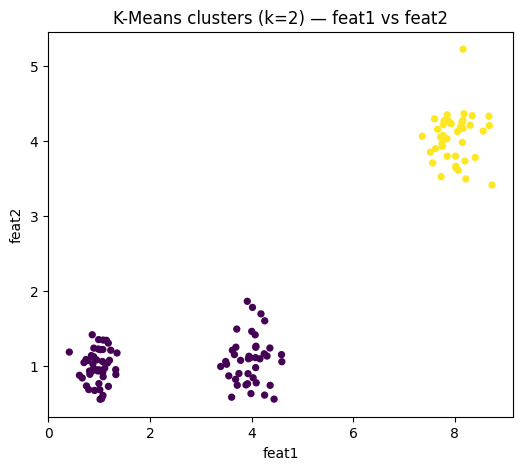

## 4.3 Compare clusters to original labels

Cluster,0,1
True class,,
A,50,0
B,40,40


## 4.4 Comment on whether clustering reveals Class B structure

- **Adjusted Rand Index (ARI)** vs true labels: `0.1357`

### Clustering interpretation
- K-means may not perfectly match original labels, especially due to Class B noise.
- However, clustering can reveal that Class B is dispersed or split into sub-groups.
- This supports the idea that Class B has heterogeneous structure.
- Clustering helps exploration/understanding, but it is not a supervised classifier.

In [ ]:
# ================================
# LAB7 - Machine Learning
# ================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    ConfusionMatrixDisplay, classification_report
)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# ----------------
# 0) Helper utils
# ----------------
def md(text):
    display(Markdown(text))

def show_df(title, df_, n=5):
    md(f"### {title}")
    display(df_.head(n))

def plot_scatter(X_df, y=None, title="Scatter plot", clusters=None):
    """
    - If y provided (A/B), encode to numeric for plotting, but keep legend.
    - If clusters provided, plot clusters.
    """
    plt.figure(figsize=(6, 5))

    if clusters is not None:
        plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=clusters, cmap="viridis", s=18)
        plt.title(title)
        plt.xlabel(X_df.columns[0])
        plt.ylabel(X_df.columns[1])
        plt.show()
        return

    if y is None:
        plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], s=18)
        plt.title(title)
        plt.xlabel(X_df.columns[0])
        plt.ylabel(X_df.columns[1])
        plt.show()
        return

    # y is categorical (e.g., A/B)
    y_series = pd.Series(y).astype("category")
    y_codes = y_series.cat.codes
    classes = list(y_series.cat.categories)

    plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_codes, cmap="coolwarm", s=18)
    plt.title(title)
    plt.xlabel(X_df.columns[0])
    plt.ylabel(X_df.columns[1])

    # Manual legend (A/B)
    handles = []
    for i, cls in enumerate(classes):
        handles.append(plt.Line2D([0], [0], marker='o', linestyle='', label=str(cls)))
    plt.legend(handles=handles, title="Class", loc="best")
    plt.show()

def get_label_order(y_true):
    """Prefer consistent order A then B if present, else use sorted unique."""
    uniq = list(pd.Series(y_true).dropna().unique())
    if "A" in uniq and "B" in uniq:
        return ["A", "B"]
    return sorted(uniq)

def evaluate_model(name, model, X_test, y_test, positive_class="B"):
    y_pred = model.predict(X_test)

    md(f"## Results — {name}")
    md(f"- **Accuracy**: `{accuracy_score(y_test, y_pred):.4f}`")
    md(f"- **Precision (pos={positive_class})**: `{precision_score(y_test, y_pred, pos_label=positive_class, zero_division=0):.4f}`")
    md(f"- **Recall (pos={positive_class})**: `{recall_score(y_test, y_pred, pos_label=positive_class, zero_division=0):.4f}`")

    md("### Classification report")
    print(classification_report(y_test, y_pred, zero_division=0))

    md("### Confusion matrix")
    labels_order = get_label_order(y_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=labels_order)
    plt.show()

    return y_pred


# ---------------------------
# 1) Load / Generate dataset
# ---------------------------
md("# FINAL LAB ")

TARGET_COL = "label"
CANDIDATE_CSVS = ["dataset.csv", "data.csv", "synthetic_datas.csv"]

csv_path = None
for f in CANDIDATE_CSVS:
    if os.path.exists(f):
        csv_path = f
        break

if csv_path is None and os.path.exists("generate_dataset.py"):
    md("## Dataset not found as CSV — running `generate_dataset.py`")
    !python generate_dataset.py

    for f in CANDIDATE_CSVS:
        if os.path.exists(f):
            csv_path = f
            break

    if csv_path is None:
        csvs = [x for x in os.listdir(".") if x.lower().endswith(".csv")]
        if csvs:
            csv_path = sorted(csvs, key=lambda x: os.path.getmtime(x), reverse=True)[0]

if csv_path is None:
    md("## ❗No CSV dataset found")
    md("Upload your CSV in Colab → Files → Upload, name it `dataset.csv`, then re-run.")
    raise FileNotFoundError("No CSV dataset found. Upload your dataset and re-run.")

md(f"## Loading dataset: `{csv_path}`")
df = pd.read_csv(csv_path, sep=";")

show_df("First rows", df)

md("## Dataset structure")
display(df.info())

md("## Missing values per column")
display(df.isnull().sum())

if TARGET_COL not in df.columns:
    md(f"## ❗Target column not found: `{TARGET_COL}`")
    md(f"Columns available: `{list(df.columns)}`")
    raise KeyError(f"Target column '{TARGET_COL}' not found.")


# ----------------
# 2) Data Exploration
# ----------------
md("# 1. Data Exploration")

X_raw = df.drop(columns=[TARGET_COL]).copy()
y_raw = df[TARGET_COL].copy()

# Force numeric
for c in X_raw.columns:
    X_raw[c] = pd.to_numeric(X_raw[c], errors="coerce")

md("## Basic statistics (features)")
display(X_raw.describe())

md("## Class distribution")
display(y_raw.value_counts(dropna=False))

if X_raw.shape[1] >= 2:
    plot_scatter(X_raw.iloc[:, :2], y=y_raw, title="Raw data (colored by class) — feat1 vs feat2")

md(
    "### Observations from data exploration\n"
    "- The dataset contains two numerical features and a categorical label (A/B).\n"
    "- Class A appears well-behaved and closer to being linearly separable.\n"
    "- Class B is more dispersed, overlaps with Class A, and may include outliers.\n"
    "- Therefore, we expect lower supervised performance on Class B."
)


# ----------------
# 3) Data Cleaning
# ----------------
md("# 2. Data Cleaning")

md("## 2.1 Missing values handling")
md(
    "**Choice:** Median imputation "
    "It is robust to extreme values and suitable for numerical features (important due to Class B outliers)."
)

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), columns=X_raw.columns)

md("Missing values after imputation:")
display(X_imputed.isnull().sum())

md("## 2.2 Outlier treatment (IQR rule)")
md("We remove extreme outliers using the 1.5×IQR rule to limit the influence of extreme noisy points.")

Q1 = X_imputed.quantile(0.25)
Q3 = X_imputed.quantile(0.75)
IQR = Q3 - Q1

mask = ~((X_imputed < (Q1 - 1.5 * IQR)) | (X_imputed > (Q3 + 1.5 * IQR))).any(axis=1)

X_clean = X_imputed.loc[mask].copy()
y_clean = y_raw.loc[mask].copy()

md(f"- Rows before outlier removal: **{len(df)}**")
md(f"- Rows after outlier removal: **{len(X_clean)}**")
md("Cleaned class distribution:")
display(y_clean.value_counts(dropna=False))

if X_clean.shape[1] >= 2:
    plot_scatter(X_clean.iloc[:, :2], y=y_clean, title="Cleaned data (colored by class) — feat1 vs feat2")

md(
    "### Data cleaning justification\n"
    "- Median imputation handles missing values without being overly sensitive to outliers.\n"
    "- IQR filtering reduces the impact of extreme points, improving model stability.\n"
    "- Cleaning helps, but Class B can remain difficult because noise/overlap are inherent."
)


# ----------------------------------
# 4) Binary Classification
# ----------------------------------
md("# 3. Binary Classification")

md("## 3.1 Train/test split + scaling")
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.30,
    random_state=42,
    stratify=y_clean
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

POS_CLASS = "B" if "B" in set(y_clean.astype(str)) else get_label_order(y_clean)[-1]

md(f"Positive class for precision/recall is set to: **{POS_CLASS}**")

md("## 3.2 Model 1 — Logistic Regression")
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_sc, y_train)
_ = evaluate_model("Logistic Regression", lr, X_test_sc, y_test, positive_class=POS_CLASS)

md("## 3.3 Model 2 — SVM (RBF kernel)")
svm = SVC(kernel="rbf", C=1.0, gamma="scale")
svm.fit(X_train_sc, y_train)
_ = evaluate_model("SVM (RBF)", svm, X_test_sc, y_test, positive_class=POS_CLASS)

md("## (Optional) Model 3 — Random Forest")
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)  # RF doesn't require scaling
_ = evaluate_model("Random Forest", rf, X_test, y_test, positive_class=POS_CLASS)

md(
    "### Analysis of classification failure on Class B\n"
    "- Class B is highly noisy and not cleanly separable.\n"
    "- There is strong overlap between A and B, causing unavoidable confusion.\n"
    "- Outliers and heterogeneity inside Class B degrade generalization.\n"
    "- Linear models struggle by design; even non-linear models can overfit noise."
)


# -------------------------
# 5) Clustering with k-means
# -------------------------
md("# 4. Clustering with k-means")

md("## 4.1 Apply k-means (k=2) on cleaned & scaled features")
X_all_sc = StandardScaler().fit_transform(X_clean)  # fresh scaling for clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_all_sc)

md("## 4.2 Visualize cluster assignments (feat1 vs feat2)")
if X_clean.shape[1] >= 2:
    plot_scatter(X_clean.iloc[:, :2], clusters=clusters, title="K-Means clusters (k=2) — feat1 vs feat2")

md("## 4.3 Compare clusters to original labels")
ct = pd.crosstab(y_clean, clusters, rownames=["True class"], colnames=["Cluster"])
display(ct)

md("## 4.4 Comment on whether clustering reveals Class B structure")
ari = adjusted_rand_score(y_clean, clusters)
md(f"- **Adjusted Rand Index (ARI)** vs true labels: `{ari:.4f}`")

md(
    "### Clustering interpretation\n"
    "- K-means may not perfectly match original labels, especially due to Class B noise.\n"
    "- However, clustering can reveal that Class B is dispersed or split into sub-groups.\n"
    "- This supports the idea that Class B has heterogeneous structure.\n"
    "- Clustering helps exploration/understanding, but it is not a supervised classifier."
)

